## pip install numpy pandas seaborn matplotlib

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load Dataset
df = pd.read_csv('ShopSphere_Dataset.csv', parse_dates=['InvoiceDate'])

In [23]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    385314 non-null  int64         
 1   InvoiceDate  385314 non-null  datetime64[ns]
 2   CustomerID   385314 non-null  int64         
 3   StockCode    385314 non-null  int64         
 4   Description  385314 non-null  object        
 5   Quantity     385314 non-null  int64         
 6   UnitPrice    385314 non-null  float64       
 7   Country      385314 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 23.5+ MB


In [25]:
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [26]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [27]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [28]:
# Total number of unique customers, unique transactions and date range of the entire dataset
num_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
date_range = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

In [29]:
print(f'Total number of Unique Customers: {num_customers}')
print(f'Total number of Unique Transactions: {num_transactions}')
print(f'Date Range of Dataset: {date_range[0]} to {date_range[1]}')

Total number of Unique Customers: 4372
Total number of Unique Transactions: 20990
Date Range of Dataset: 2023-12-01 00:25:31 to 2024-12-31 23:52:56


In [30]:
# Validate Data to check for non-positive records
print('Rows with non-positive Quantity:', (df['Quantity'] <= 0).sum())
print('Rows with non-positive UnitPrice:', (df['UnitPrice'] <= 0).sum())

Rows with non-positive Quantity: 0
Rows with non-positive UnitPrice: 0


In [31]:
# Checking average revenue
average_revenue = df['Revenue'].mean()
print(f'Average order value: {average_revenue}')

Average order value: 2341.7934992499618


In [32]:
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print('Country by number of customers')
print(top_countries)

Country by number of customers
Country
United States     4372
United Kingdom    4359
Name: CustomerID, dtype: int64


C:\Users\ISAIAH\AppData\Local\Temp\ipykernel_38864\2525973203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


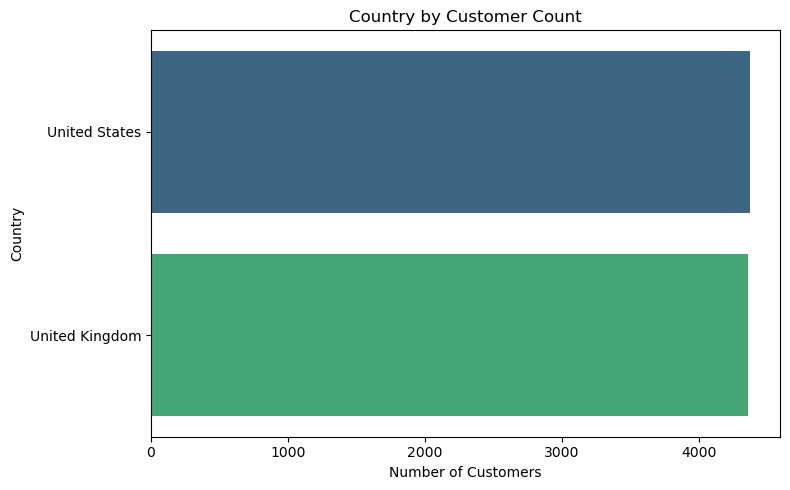

In [33]:
# plotting top country by customer count
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Country by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

C:\Users\ISAIAH\AppData\Local\Temp\ipykernel_38864\3216994005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


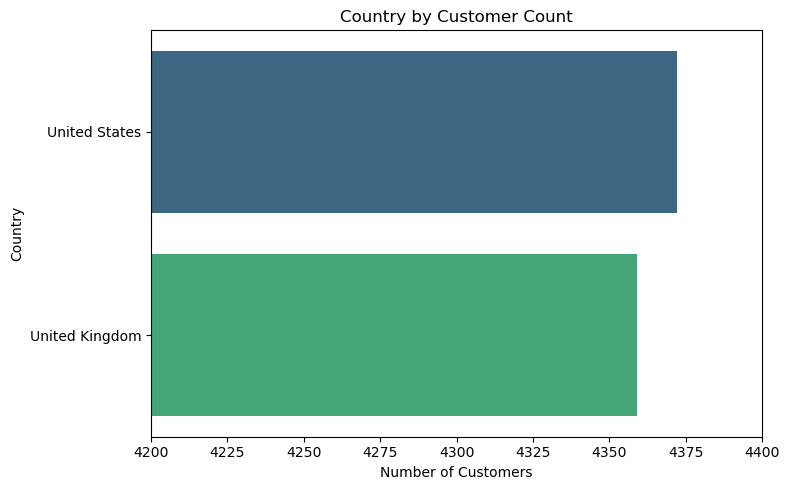

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlim(4200, 4400)
plt.title('Country by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [35]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [36]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36,2024-01
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04,2024-01
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68,2024-01
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10,2024-01
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64,2024-01


In [37]:
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()
cohort_data.name = 'CohortMonth'

In [38]:
df = df.merge(cohort_data, on='CustomerID')

In [39]:
df.tail(20)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth
385294,420988,2024-09-13 20:45:34,14371,40040,Fashion,25,45.26,United Kingdom,1131.50,2024-09,2024-05
385295,420989,2024-10-11 09:01:10,14371,40178,Home & Living,52,51.52,United States,2679.04,2024-10,2024-05
385296,420989,2024-10-11 09:01:10,14371,40480,Sports & Outdoors,66,33.39,United States,2203.74,2024-10,2024-05
385297,420989,2024-10-11 09:01:10,14371,40047,Fashion,91,57.54,United States,5236.14,2024-10,2024-05
385298,420989,2024-10-11 09:01:10,14371,40420,Toys,17,30.03,United Kingdom,510.51,2024-10,2024-05
385299,420989,2024-10-11 09:01:10,14371,40402,Toys,59,16.70,United States,985.30,2024-10,2024-05
385300,420989,2024-10-11 09:01:10,14371,40294,Beauty & Wellness,69,30.04,United States,2072.76,2024-10,2024-05
385301,420989,2024-10-11 09:01:10,14371,40090,Electronics,100,138.66,United States,13866.00,2024-10,2024-05
385302,420989,2024-10-11 09:01:10,14371,40209,Home & Living,50,200.50,United States,10025.00,2024-10,2024-05
385303,420989,2024-10-11 09:01:10,14371,40311,Beauty & Wellness,54,21.03,United Kingdom,1135.62,2024-10,2024-05


In [40]:
invoice_year, invoice_month = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month
cohort_year, cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [41]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [42]:
df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [43]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36,2024-01,2024-01,1
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04,2024-01,2024-01,1
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68,2024-01,2024-01,1
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10,2024-01,2024-01,1
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64,2024-01,2024-01,1


In [44]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,705.95,2024-10,2024-05,6
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2014.74,2024-10,2024-05,6
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,1513.92,2024-10,2024-05,6
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,3994.00,2024-10,2024-05,6
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States,2325.44,2024-10,2024-05,6


In [45]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [46]:
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,344.0,79.0,73.0,97.0,90.0,90.0,95.0,100.0,96.0,118.0,94.0,138.0,83.0
2024-01,329.0,78.0,94.0,93.0,76.0,92.0,88.0,84.0,90.0,101.0,87.0,131.0,NaN
2024-02,337.0,86.0,95.0,94.0,83.0,96.0,82.0,99.0,94.0,109.0,106.0,NaN,NaN
2024-03,334.0,73.0,86.0,99.0,91.0,98.0,88.0,95.0,106.0,98.0,NaN,NaN,NaN
2024-04,334.0,101.0,86.0,92.0,96.0,103.0,93.0,92.0,91.0,NaN,NaN,NaN,NaN
2024-05,349.0,91.0,81.0,94.0,103.0,102.0,109.0,90.0,NaN,NaN,NaN,NaN,NaN
2024-06,312.0,76.0,74.0,80.0,82.0,98.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,347.0,107.0,82.0,89.0,98.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,335.0,81.0,80.0,92.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,1.0,0.230,0.212,0.282,0.262,0.262,0.276,0.291,0.279,0.343,0.273,0.401,0.241
2024-01,1.0,0.237,0.286,0.283,0.231,0.280,0.267,0.255,0.274,0.307,0.264,0.398,NaN
2024-02,1.0,0.255,0.282,0.279,0.246,0.285,0.243,0.294,0.279,0.323,0.315,NaN,NaN
2024-03,1.0,0.219,0.257,0.296,0.272,0.293,0.263,0.284,0.317,0.293,NaN,NaN,NaN
2024-04,1.0,0.302,0.257,0.275,0.287,0.308,0.278,0.275,0.272,NaN,NaN,NaN,NaN
2024-05,1.0,0.261,0.232,0.269,0.295,0.292,0.312,0.258,NaN,NaN,NaN,NaN,NaN
2024-06,1.0,0.244,0.237,0.256,0.263,0.314,0.276,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,1.0,0.308,0.236,0.256,0.282,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,1.0,0.242,0.239,0.275,0.278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


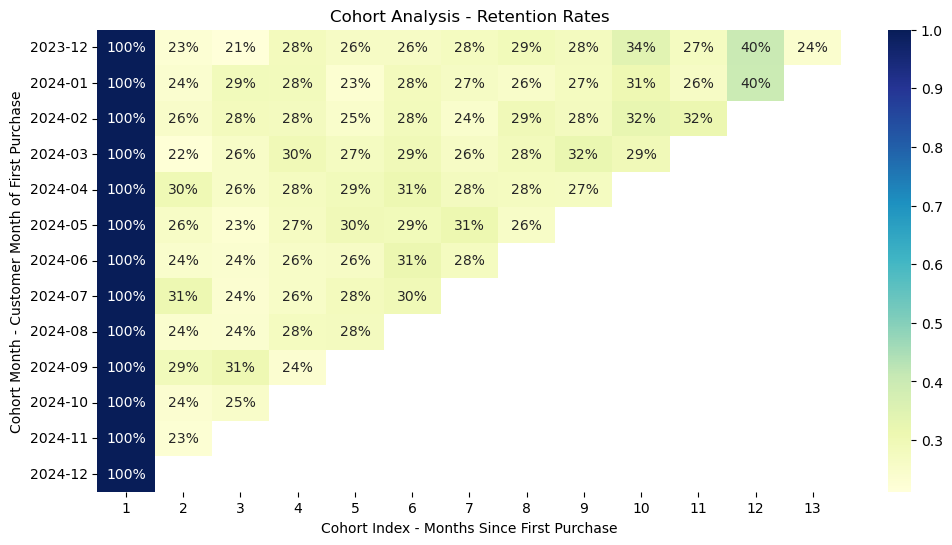

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Month - Customer Month of First Purchase')
plt.xlabel('Cohort Index - Months Since First Purchase')
plt.show()

In [49]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [50]:
reference_date

Timestamp('2025-01-01 23:52:56')

In [51]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue': 'sum'
}).reset_index()

In [52]:
rfm.columns = ['CustomerID', 'recency_days', 'frequency', 'monetary']

In [53]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,10000,140,5,242993.87
1,10001,86,1,20841.75
2,10002,23,6,254693.19
3,10003,89,2,115314.08
4,10004,100,7,305794.35


In [54]:
from sklearn.preprocessing import StandardScaler

X = rfm[['recency_days', 'frequency', 'monetary']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled

array([[ 1.07915363,  0.06017119,  0.25019975],
       [ 0.26375028, -1.14933883, -1.26817781],
       [-0.68755362,  0.36254869,  0.33016291],
       ...,
       [-0.37045232, -1.14933883, -1.05706758],
       [-0.86875437,  1.57205871,  1.76664742],
       [ 0.20335003,  0.06017119,  0.20268637]])

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [57]:
inertia = []
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

c:\Users\ISAIAH\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ISAIAH\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ISAIAH\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ISAIAH\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ISAIAH\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

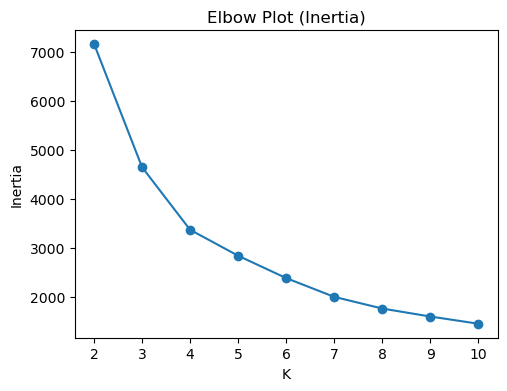

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot (Inertia)')
plt.ylabel('Inertia')
plt.xlabel('K')
plt.show()

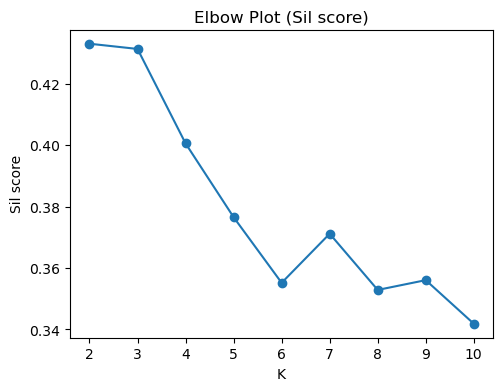

In [59]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, sil_scores, marker='o')
plt.title('Elbow Plot (Sil score)')
plt.ylabel('Sil score')
plt.xlabel('K')
plt.show()

pip install yellowbrick

In [60]:
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

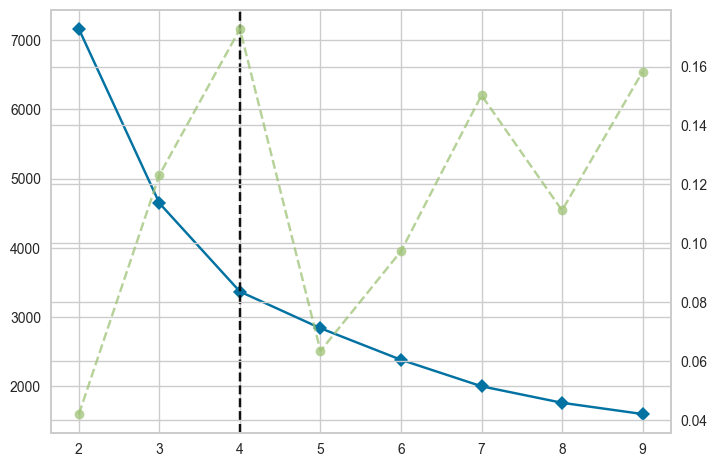

In [ ]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)

In [61]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [62]:
rfm['Clusters'] = kmeans.labels_
rfm.head()

,CustomerID,recency_days,frequency,monetary,Clusters
0,10000,140,5,242993.87,2
1,10001,86,1,20841.75,1
2,10002,23,6,254693.19,0
3,10003,89,2,115314.08,1
4,10004,100,7,305794.35,0


In [63]:
cluster_profile = rfm.groupby('Clusters').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)

In [64]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
Clusters,,,,
0,47.1,6.3,269730.0,1367
1,45.0,2.4,99169.9,1733
2,186.8,2.9,125700.8,719
3,41.5,11.2,490713.6,553


In [65]:
cluster_names = {
    3: 'V-VIPs',
    0: 'VIPs',
    1: 'Loyal Regulars',
    2: 'At Risk / Lost'
}

In [66]:
cluster_profile['Segment'] = cluster_profile.index.map(cluster_names)

In [67]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers,Segment
Clusters,,,,,
0,47.1,6.3,269730.0,1367,VIPs
1,45.0,2.4,99169.9,1733,Loyal Regulars
2,186.8,2.9,125700.8,719,At Risk / Lost
3,41.5,11.2,490713.6,553,V-VIPs


In [68]:
cluster_profile.columns

Index(['recency_days', 'frequency', 'monetary', 'NumCustomers', 'Segment'], dtype='object')

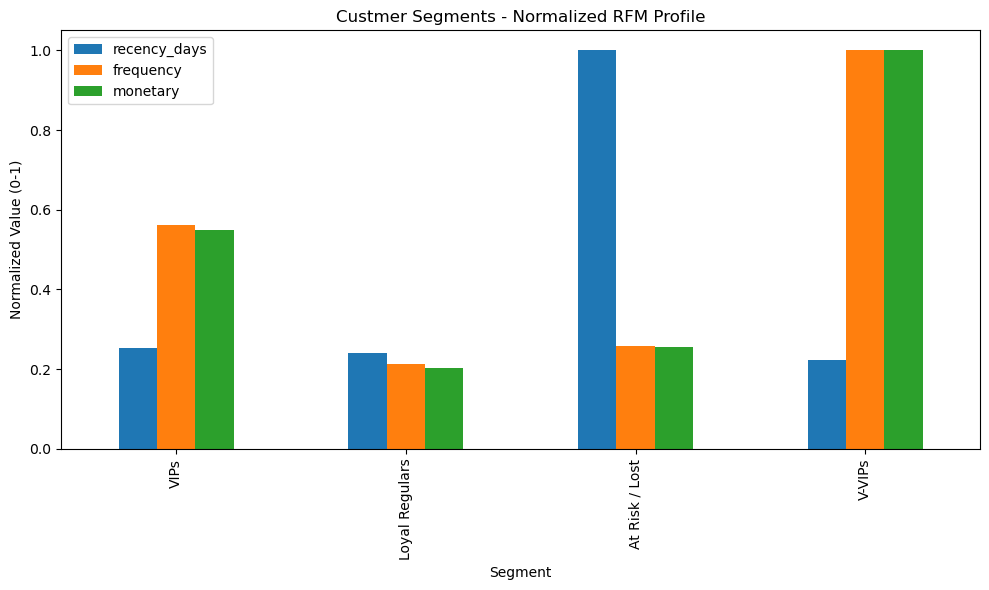

In [69]:
df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'monetary']] = (
    df_plot[['recency_days', 'frequency', 'monetary']].apply(lambda x: x /x.max())
)

df_plot.set_index('Segment')[['recency_days', 'frequency', 'monetary']].plot(kind='bar', figsize=(10,6))
plt.title('Custmer Segments - Normalized RFM Profile')
plt.ylabel('Normalized Value (0-1)')
plt.tight_layout()
plt.show()

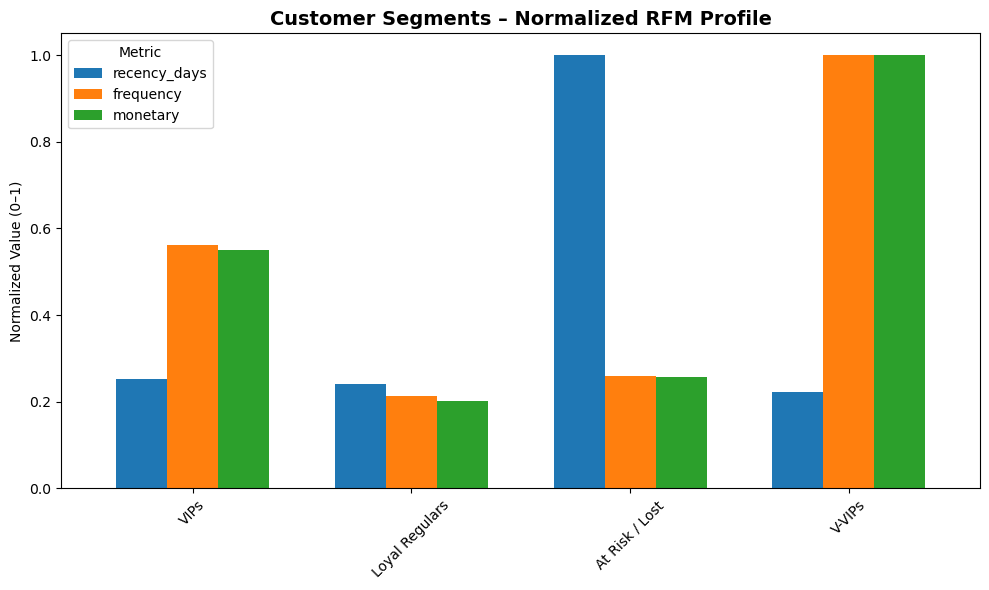

In [70]:
# Normalize RFM columns (0–1 scale)
df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'monetary']] = df_plot[['recency_days', 'frequency', 'monetary']].apply(lambda x: x / x.max())

# Bar chart
df_plot.set_index('Segment')[['recency_days', 'frequency', 'monetary']].plot(kind='bar', figsize=(10,6), width=0.7)
plt.title('Customer Segments – Normalized RFM Profile', fontsize=14, weight='bold')
plt.ylabel('Normalized Value (0–1)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


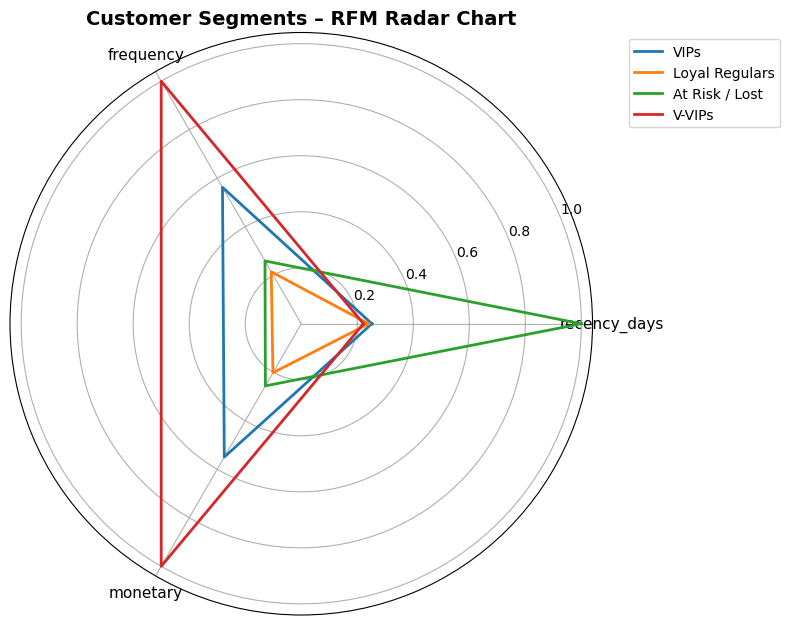

In [71]:
# Prepare data
df_radar = df_plot.set_index('Segment')[['recency_days', 'frequency', 'monetary']]

# Radar setup
labels = list(df_radar.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
for idx, row in df_radar.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=idx, linewidth=2)

plt.xticks(angles[:-1], labels, fontsize=11)
plt.title('Customer Segments – RFM Radar Chart', size=14, weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

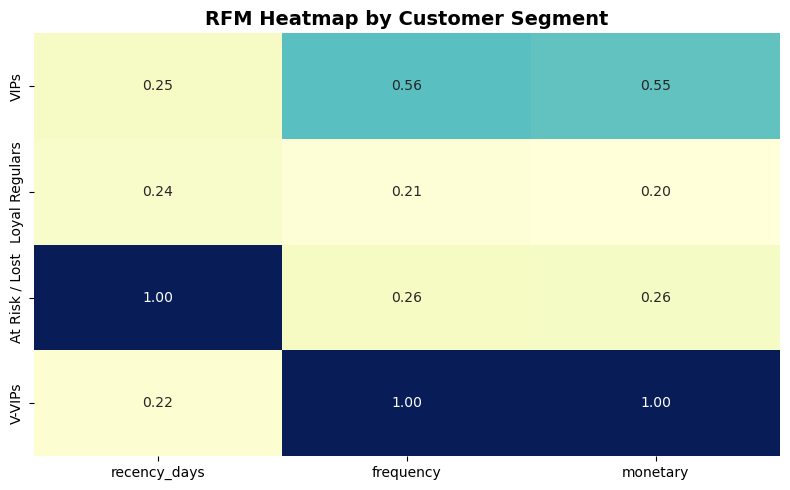

In [72]:
plt.figure(figsize=(8,5))
sns.heatmap(df_plot.set_index('Segment')[['recency_days', 'frequency', 'monetary']], 
            annot=True, cmap='YlGnBu', cbar=False, fmt=".2f")
plt.title('RFM Heatmap by Customer Segment', fontsize=14, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

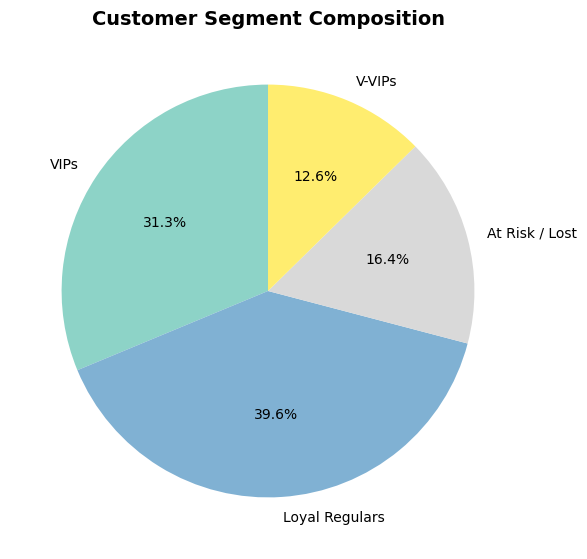

In [73]:
plt.figure(figsize=(6,6))
cluster_profile.set_index('Segment')['NumCustomers'].plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', textprops={'fontsize': 10})
plt.ylabel('')
plt.title('Customer Segment Composition', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [76]:
if 'CLV' in cluster_profile.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(data=cluster_profile, x='Segment', y='CLV', palette='Set2')
    plt.title('Average Customer Lifetime Value (CLV) by Segment', fontsize=14, weight='bold')
    plt.ylabel('Average CLV')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()
